In [ ]:
# Importamos librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from matplotlib.colors import ListedColormap

from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# 1. EDA
Se relizará un análisis exploratorio, así como la visualización de la misma para un mejor entendimiento de los datos.

In [ ]:
# Extraemos datos
data='/content/para volumen 4ta vuelta.csv'

In [ ]:
# Visualizamos el dataset
df= pd.read_csv(data)
df.head()

,C,Rp,Dif_vol,V_in,V_out,P_ventilador,PIP,Error_aceptable
0,20,20,-2.7,350,352.7,27.6,25.5,1
1,20,20,-4.7,350,354.7,30.3,30.2,1
2,20,20,1.2,350,348.8,32.0,33.0,1
3,20,20,3.1,400,396.9,30.3,29.4,1
4,20,20,-7.0,400,407.0,33.9,34.3,1


In [ ]:
# Revisamos dimension de la data
df.shape 

(69, 8)

In [ ]:
# Filtramos decartando columnas con datos faltantes
d_filtrado = df.dropna().copy() 

In [ ]:
# Verificamos cuantos valores tenemos de Rp
d_filtrado.V_out.unique()

array([352.7, 354.7, 348.8, 396.9, 407. , 401.6, 442.2, 455.5, 451.2,
       482.2, 492. , 494.5, 541.7, 549.6, 558.5, 597.3, 599. , 612.5,
       327.8, 307.5, 303.2, 375. , 360.8, 358.6, 419.6, 408.8, 407.5,
       455.2, 457.3, 461.5, 518.2, 515.8, 524.4, 574. , 571.6, 296.8,
       281.3, 277.5, 335.2, 332.8, 330.7, 382. , 377. , 383. , 436.4,
       429.6, 436.5, 498.1, 496.1, 499.6, 552. , 548.8, 269. , 302.6,
       302.7, 303. , 344.1, 344.2, 389.1, 396.6, 386.5, 435.7, 452.7,
       487.9, 509.7, 527. , 544.5, 559.9])

In [ ]:
# Revisamos de la data filtrada
d_filtrado.shape

(69, 8)

In [ ]:
# Contar valores de "Error aceptable"
d_filtrado['Error_aceptable'].value_counts()

1    53
0    16
Name: Error_aceptable, dtype: int64

In [ ]:
# Revisamos su proporción
d_filtrado['Error_aceptable'].value_counts()/len(d_filtrado)

1    0.768116
0    0.231884
Name: Error_aceptable, dtype: float64

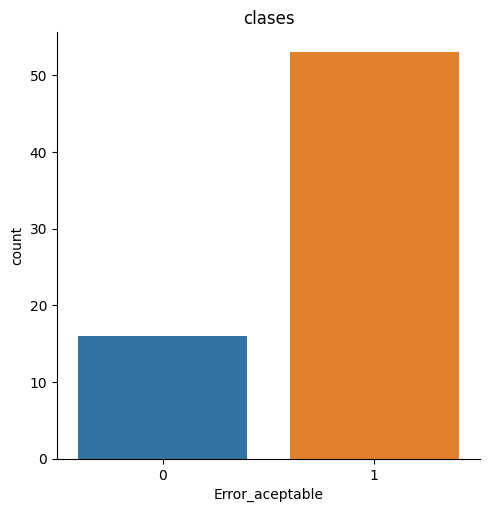

In [ ]:
# Observamos el desbalance de datos de "Error aceptable"
p=sns.catplot(data = d_filtrado, kind ='count', x= 'Error_aceptable')
p.set(title = "clases")

# Tomando las variables hechas en clase
Para el posterior análisis se tomarán las variables mencionadas por el profesor en clase.

In [ ]:
# Definimos la matriz de caracteristicas
x = d_filtrado.loc[:,['V_in','V_out']] #Entrada
y = d_filtrado['Error_aceptable'] #Salida
     

In [ ]:
x.head()

,V_in,V_out
0,350,352.7
1,350,354.7
2,350,348.8
3,400,396.9
4,400,407.0


In [ ]:
# Viendo la distribución de los datos del error aceptable
print(len(y[y==0]))
print(len(y[y==1]))

16
53


In [ ]:
# Divimos la data en conjunto de entrenamiento y test
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state = 0)
print(len(x_train),len(x_test))
# Data X de entrenamiento - Data X de testeo

51 18


In [ ]:
print(len(y_train[y_train==0]))
print(len(y_train[y_train==1]))
# Data Y de entrenamiento - Data Y de testeo

11
40


In [ ]:
# Estandarización de características
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

In [ ]:
print(df.head())

    C  Rp  Dif_vol  V_in  V_out  P_ventilador   PIP  Error_aceptable
0  20  20     -2.7   350  352.7          27.6  25.5                1
1  20  20     -4.7   350  354.7          30.3  30.2                1
2  20  20      1.2   350  348.8          32.0  33.0                1
3  20  20      3.1   400  396.9          30.3  29.4                1
4  20  20     -7.0   400  407.0          33.9  34.3                1


Se aplicará regresión logística en todos los casos aplicados, este modelo es el mejor para el ejercicio porque es una clasificación binaria (0,1).

In [ ]:
# Creando el modelo
regLog = LogisticRegression(random_state = 0)
regLog.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [ ]:
# Se añade una columna constante para el término de intercepción
x_train_with_const = sm.add_constant(x_train)

# Crear un modelo logístico con statsmodels
logit_model = sm.Logit(y_train, x_train_with_const)

# Ajustar el modelo
result = logit_model.fit()

# Obtener los coeficientes y los p-valores
coefficients = result.params
p_values = result.pvalues

print("Coeficientes:")
print(coefficients)
print("\nP-valores:")
print(p_values)

         Current function value: 0.000000
         Iterations: 35
Coeficientes:
const     441.072193
x1      -1230.485189
x2       1571.590356
dtype: float64

P-valores:
const    0.986906
x1       0.986877
x2       0.986878
dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Se puede observar que los p-valores son mayores a 0.05, por ende los resultados obtenidos con el modelo no resultarían ser estadísticamente significativo para poder definir mediante esta las salidas en la data de testeo de manera fiable.

In [ ]:
# Se hace la predición del modelo entrenado con los datos del test
y_pred = regLog.predict(x_test)

<ipython-input-21-bfce668329e9>:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j,0],x_set[y_set== j,1],


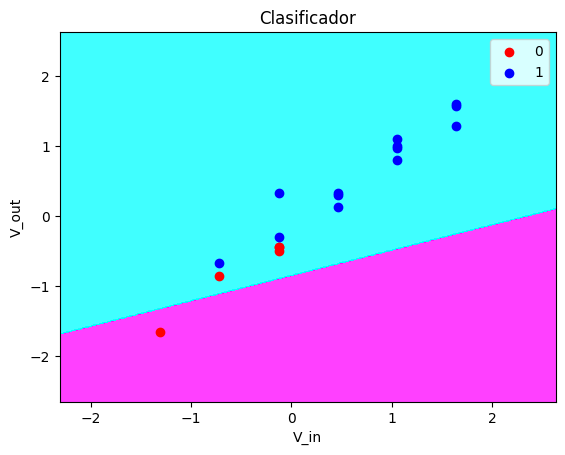

In [ ]:
# Creamos un plot para ver la frontera de clasificación
x_set, y_set = x_test, y_test
X1,X2 = np.meshgrid(np.arange(start = x_set[:,0].min()-1,stop = x_set[:,0].max()+1,step=0.01),
                    np.arange(start = x_set[:,1].min()-1,stop = x_set[:,0].max()+1,step=0.01))
plt.contourf(X1,X2, regLog.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap = ListedColormap(('magenta', 'cyan')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j,0],x_set[y_set== j,1],
                c = ListedColormap(('red','blue'))(i),label = j)
    
plt.title('Clasificador')
plt.xlabel('V_in')
plt.ylabel('V_out')
plt.legend()
plt.show()

Se puede observar como la frontera de clasificación no se encuentra bien definida debido a la presencia de outputs fuera de su región de predicción.

### Metricas

In [ ]:
# Se muestran los valores de métricas del primer modelo
print(classification_report(y_test, y_pred))
     

              precision    recall  f1-score   support

           0       1.00      0.20      0.33         5
           1       0.76      1.00      0.87        13

    accuracy                           0.78        18
   macro avg       0.88      0.60      0.60        18
weighted avg       0.83      0.78      0.72        18



Se observa que su precisión es muy baja debido a la poca cantidad de datos como las de entrenamiento en Y en el que se tiene muy pocos datos iguales a 0 en la variable de "Error esperado", por ende se debe aplicar técnicas para solucionar el error.

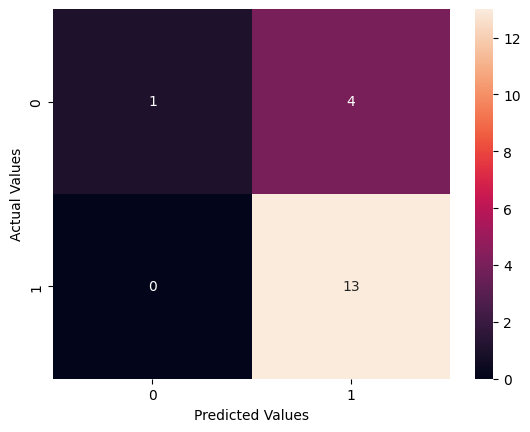

In [ ]:
# Mostrando la confusion matrix
cm = confusion_matrix(y_test, y_pred)
fig = plt.figure()
sns.heatmap(cm, annot=True)
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

En la matriz de confusión se puede observar como existen 4 falsos positivos y que predomina más la obtención de 13 positivos verdaderos, mientras que solo se obtuvo 1 valor falso verdadero. Viendolo de manera proporcionada, hay una cantidad significativa de valores erroneos predecidos por lo que se procederá a aplicar un balance ROS.

In [ ]:
# K-fold cross validation
# accuracies = cross_val_score(estimator = regLog, X = x_train, y=y_train, cv= 10)
# accuracies.mean()

In [ ]:
# accuracies

## Balanceo ROS

In [ ]:
# Se crea un nuevo Dataset
train = np.concatenate([x_train, y_train.values.reshape(-1,1)], axis=1)

In [ ]:
# Transformamos a un dataFrame
train = pd.DataFrame(train,columns=['V_int','V_out','Error_aceptable'])

In [ ]:
# Obtenemos la clase con error que no se acepta
train_class_0 = train.query("Error_aceptable == 0")
train_class_0.head()

,V_int,V_out,Error_aceptable
10,-0.716967,-0.994151,0.0
12,0.462559,0.061645,0.0
13,-0.716967,-0.851101,0.0
16,-0.716967,-1.289859,0.0
20,-1.306730,-1.356046,0.0


In [ ]:
# Se observa la distribucion de los datos
n_class0 = len(train.query("Error_aceptable == 0"))
n_class1 = len(train.query("Error_aceptable == 1"))
print ( n_class0, n_class1)

11 40


In [ ]:
# Se hace el sampleo para completar los datos faltantes
i_class0_downsampled = train_class_0.sample(n_class1,replace = True)
len(i_class0_downsampled)

40

In [ ]:
# Se concatenan los nuevos datos a "new_train"
new_train = pd.concat([train.query("Error_aceptable == 1"), i_class0_downsampled], axis=0)
new_train[['Error_aceptable']].value_counts()

Error_aceptable
0.0                40
1.0                40
dtype: int64

In [ ]:
# Se seleccionan las nuevas variables X y Y
new_x_train =new_train.loc[:,['V_int','V_out']].values
new_y_train =new_train.loc[:,['Error_aceptable']].values

In [ ]:
new_y_train = pd.Series(new_y_train.reshape(-1,))

In [ ]:
# Se observa la nueva distribucion de los datos
new_train.loc[:,['Error_aceptable']].value_counts()

Error_aceptable
0.0                40
1.0                40
dtype: int64

In [ ]:
# Se crea el nuevo modelo
model= LogisticRegression()
model. fit(new_x_train, new_y_train)

LogisticRegression()

In [ ]:
# Se realiza la nueva predicción
y_pred2 = model.predict(x_test)

<ipython-input-37-3a7197766a37>:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j,0],x_set[y_set== j,1],


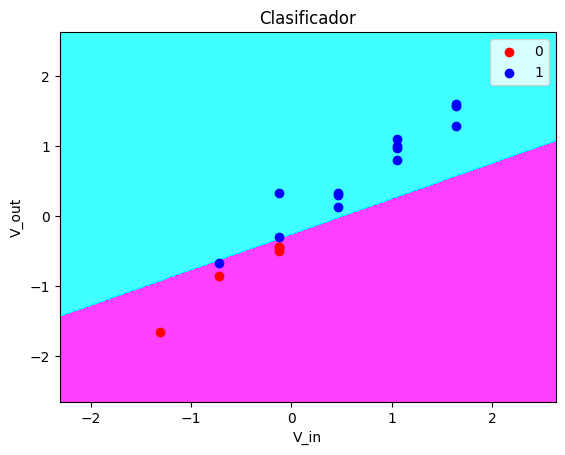

In [ ]:
# Creamos un plot para ver la frontera de clasificación y la calsificación de la misma

x_set, y_set = x_test, y_test
X1,X2 = np.meshgrid(np.arange(start = x_set[:,0].min()-1,stop = x_set[:,0].max()+1,step=0.01),
                    np.arange(start = x_set[:,1].min()-1,stop = x_set[:,0].max()+1,step=0.01))
plt.contourf(X1,X2, model.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap = ListedColormap(('magenta', 'cyan')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j,0],x_set[y_set== j,1],
                c = ListedColormap(('red','blue'))(i),label = j)
    
plt.title('Clasificador')
plt.xlabel('V_in')
plt.ylabel('V_out')
plt.legend()
plt.show()

### Metricas

In [ ]:
# Se imprimen las métricas para realizar una comparación de las mismas.
print(classification_report(y_test, y_pred))
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       1.00      0.20      0.33         5
           1       0.76      1.00      0.87        13

    accuracy                           0.78        18
   macro avg       0.88      0.60      0.60        18
weighted avg       0.83      0.78      0.72        18

              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.92      0.96        13

    accuracy                           0.94        18
   macro avg       0.92      0.96      0.93        18
weighted avg       0.95      0.94      0.95        18



Tras aplicar el balance ROS se obtuvo una mejora en los resultados. Al compararlo con el modelo anterior se puede destacar una mayor presición en este segundo modelo clasificador aplicado con un valor de 0.94. Además, en este segundo caso se obtuvo una mayor proporción de precisión en la obtención de las salidas "0" y "1". Si se compara el peso promedio y el promedio macro tambien se obtuvo un mayor resultado con este ultimo modelo, lo que demuestra que las características usadas tienen una alta relación con la predicción realizada y que el modelo es capaz de realizar predicciones precisas en varias clases evitando el overfitting.

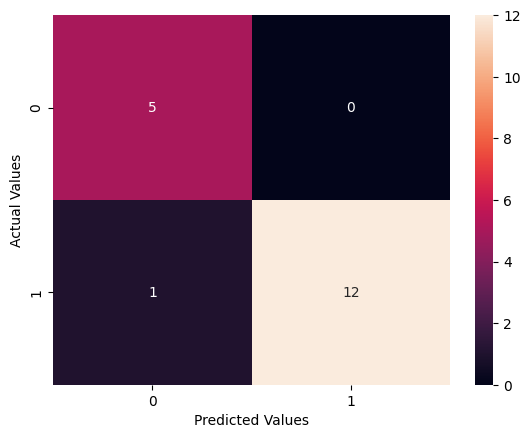

In [ ]:
# Observando la distribución de los nuevos datos
cm = confusion_matrix(y_test, y_pred2)
fig = plt.figure()
sns.heatmap(cm, annot=True)
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

Se puede notar que el modelo con el balance ROS es bueno, luego de realizar un aumento de sus datos, puesto que su precisión es de 94%.
Esto se refleja en la confusion matrix, puesto que se observa que unicamente un valor es el incorrecto siendo este 1, mientras que es predecido como 0. Sin embargo, al obtener p-values mayores a 0.05, no hay suficiente evidencia estadística para afirmar que los resultados observados podrían haber ocurrido por la eficiencia del clasificador y no por el azar. Por ello, se realizará una variante al método de regresión.

# Escogiendo 2 variables

In [ ]:
# Definimos la matriz de características
x2 = d_filtrado.loc[:,['PIP', 'C']]
y2 = d_filtrado['Error_aceptable']

In [ ]:
# Dividimos la data en conjunto de entrenamiento y test
x2_train, x2_test, y2_train, y2_test = train_test_split(x2,y2, test_size = 0.25, random_state = 0, shuffle=True)
print(len(x2_train),len(x2_test))

51 18


In [ ]:
# Viendo la distribución de los datos del error aceptable
print(len(y2[y2==0]))
print(len(y2[y2==1]))

16
53


In [ ]:
# Estandarización de características
sc_x = StandardScaler()
x2_train = sc_x.fit_transform(x2_train)
x2_test = sc_x.transform(x2_test)

In [ ]:
# Creamos el modelo
regLog2 = LogisticRegression(random_state = 0)
regLog2.fit(x2_train,y2_train)

LogisticRegression(random_state=0)

In [ ]:
# Se anade una columna constante para el término de intercepción
x2_train_with_const = sm.add_constant(x2_train)

# Crear un modelo logístico con statsmodels
logit_model = sm.Logit(y2_train, x2_train_with_const)

# Ajustar el modelo
result = logit_model.fit()

# Obtener los coeficientes y los p-valores
coefficients = result.params
p_values = result.pvalues

print("Coeficientes:")
print(coefficients)
print("\nP-valores:")
print(p_values)

Optimization terminated successfully.
         Current function value: 0.372761
         Iterations 7
Coeficientes:
const    1.996099
x1       2.204054
x2       1.793980
dtype: float64

P-valores:
const    0.000503
x1       0.005551
x2       0.004847
dtype: float64


En este nuevo caso, escogiendo 2 variables de la matriz de características, se obtiene un valor-p menor a 0.05. Esto significa que los resultados pueden ser estadísticamente significativos, se procederá a evaluar la predicción para corroborar que las variables predictoras están relacionadas de manera significativa con el resultado del modelo.

In [ ]:
# Realizando la predicción para el nuevo conjunto de datos x2
y2_pred = regLog2.predict(x2_test)

<ipython-input-47-e2fc7d238a00>:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j,0],x_set[y_set== j,1],


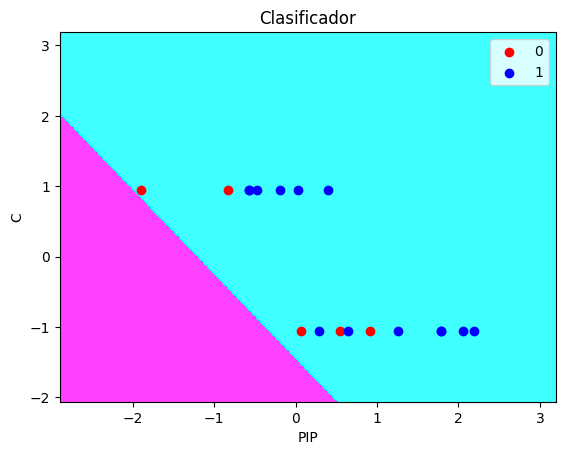

In [ ]:
# Observando la distribución de los datos
x_set, y_set = x2_test, y2_test
X1,X2 = np.meshgrid(np.arange(start = x_set[:,0].min()-1,stop = x_set[:,0].max()+1,step=0.01),
                    np.arange(start = x_set[:,1].min()-1,stop = x_set[:,0].max()+1,step=0.01))
plt.contourf(X1,X2, regLog2.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap = ListedColormap(('magenta', 'cyan')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j,0],x_set[y_set== j,1],
                c = ListedColormap(('red','blue'))(i),label = j)
    
plt.title('Clasificador')
plt.xlabel('PIP')
plt.ylabel('C')
plt.legend()
plt.show()

### Metricas

In [ ]:
# Mostrando métricas
print(classification_report(y2_test, y2_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.72      1.00      0.84        13

    accuracy                           0.72        18
   macro avg       0.36      0.50      0.42        18
weighted avg       0.52      0.72      0.61        18



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Mediante este modelo podemos observar una presición baja que se relaciona con un bajo valor del peso promedio y el promedio macro, lo que significa que la clasificación no resulta ser fiable, esto se puede observar en la gráfica anterior en el que las regiones de clasificación no concuerdan con las variables predecidas.

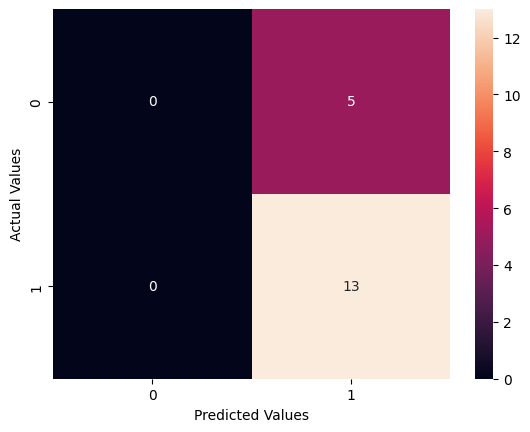

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y2_test, y2_pred)
fig = plt.figure()
sns.heatmap(cm, annot=True)
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

Se confirma la menor capacidad de predicción en este modelo debido a a presencia de 5 falsos positivos y que todas las salidas predecidas fueron positivas. Pese a que los resultados sean significativos el proceso implementado en este modelo no resulta pertinente. Aplicaremos el balance ROS para mejorar el modelo.

## Balance ROS


In [ ]:
train = np.concatenate([x2_train, y2_train.values.reshape(-1,1)], axis=1)

In [ ]:
train = pd.DataFrame(train,columns=['PIP','C','Error_aceptable'])

In [ ]:
# Obtenemos la clase con error que no se acepta
train_class_0 = train.query("Error_aceptable == 0")
train_class_0.head()

,PIP,C,Error_aceptable
10,0.439871,-1.060660,0.0
12,1.027543,-1.060660,0.0
13,-1.064570,0.942809,0.0
16,-1.691421,0.942809,0.0
20,-0.845173,-1.060660,0.0


In [ ]:
# Se observa la distribución entre valores
n_class0 = len(train.query("Error_aceptable == 0"))
n_class1 = len(train.query("Error_aceptable == 1"))
print ( n_class0, n_class1)

11 40


In [ ]:
# Haciendo el sampleo
i_class0_downsampled = train_class_0.sample(n_class1,replace = True)
len(i_class0_downsampled)


40

In [ ]:
# Nueva Dataset
new_train = pd.concat([train.query("Error_aceptable == 1"), i_class0_downsampled], axis=0)
new_train[['Error_aceptable']].value_counts()

Error_aceptable
0.0                40
1.0                40
dtype: int64

In [ ]:
# Creando nuevas variables de entrenamiento
new_x_train =new_train.loc[:,['PIP','C']].values
new_y_train =new_train.loc[:,['Error_aceptable']].values

In [ ]:
new_y_train = pd.Series(new_y_train.reshape(-1,))

In [ ]:
# Creando el modelo
model= LogisticRegression()
model. fit(new_x_train, new_y_train)

LogisticRegression()

In [ ]:
# Se realiza la predicción del test con el nuevo modelo entrenado
y2_pred2 = model.predict(x2_test)

<ipython-input-61-8745c6a4cfcb>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j,0],x_set[y_set== j,1],


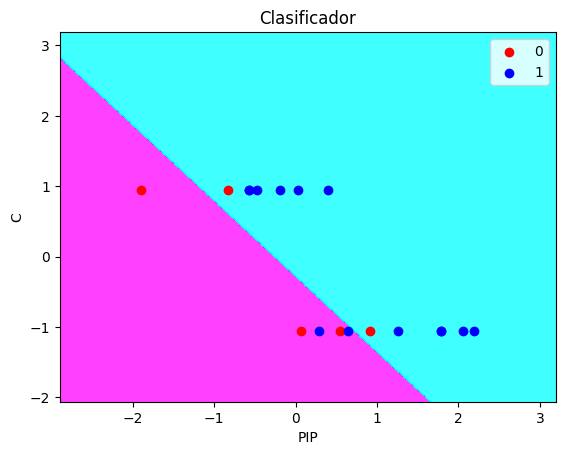

In [ ]:
# Se visualiza la distribucion de los datos
x_set, y_set = x2_test, y2_test
X1,X2 = np.meshgrid(np.arange(start = x_set[:,0].min()-1,stop = x_set[:,0].max()+1,step=0.01),
                    np.arange(start = x_set[:,1].min()-1,stop = x_set[:,0].max()+1,step=0.01))
plt.contourf(X1,X2, model.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap = ListedColormap(('magenta', 'cyan')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j,0],x_set[y_set== j,1],
                c = ListedColormap(('red','blue'))(i),label = j)
    
plt.title('Clasificador')
plt.xlabel('PIP')
plt.ylabel('C')
plt.legend()
plt.show()

In [ ]:
# Se imprimen los valores de las métricas
print(classification_report(y2_test, y2_pred))
print(classification_report(y2_test, y2_pred2))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.72      1.00      0.84        13

    accuracy                           0.72        18
   macro avg       0.36      0.50      0.42        18
weighted avg       0.52      0.72      0.61        18

              precision    recall  f1-score   support

           0       0.60      0.60      0.60         5
           1       0.85      0.85      0.85        13

    accuracy                           0.78        18
   macro avg       0.72      0.72      0.72        18
weighted avg       0.78      0.78      0.78        18



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Ahora se observa una mayor presición y valores de promedio que en el anterior modelo ya que se obtiene resultados predictivos en ambas clases en vez de solo una, denotando cierta capacidad de generalización. Sin embargo, no resulta ser tan alto como para obtener un correcto clasificador. Esto lo confirmaremos en la matriz de confusión.

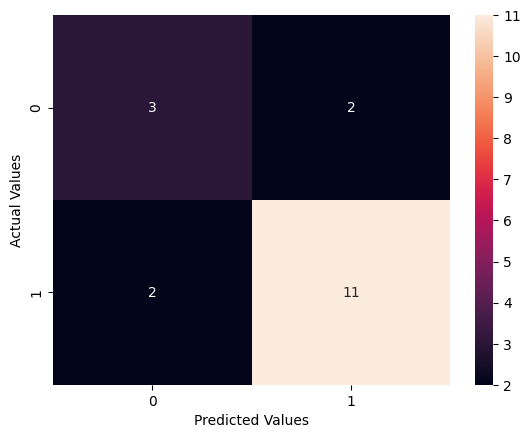

In [ ]:
# Mostrando confusion matrix para ver los errores en la predicción
cm = confusion_matrix(y_test, y2_pred2)
fig = plt.figure()
sns.heatmap(cm, annot=True)
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

En el cuadro hay 3 errores, 2 se marcaron como si fueran 1 cuando son cero y 1 fue predicho como 0 cuando es 1, indicando la presencia de falsos positivos y falsos negativos. Por lo que las predicciones aún no resultan ser precisoss; sin embargo, existe una mayor variabilidad en las predicciones de distinta clase debido a que, como se vio en el cuadro comparativo anterior, hubo un mejor valor del peso promedio y el promedio macro que permite clasificar de mejor forma los datos de entrada en diferentes categorías en general. 

# Probando con 3 variables

In [ ]:
# Definimos la matriz de caracteristicas
x3 = d_filtrado.loc[:,['C','PIP','P_ventilador']]
y3 = d_filtrado['Error_aceptable']

In [ ]:
# Dividimos la data en conjunto de entranimiento y test
from sklearn.model_selection import train_test_split
x3_train, x3_test, y3_train, y3_test = train_test_split(x3,y3, test_size = 0.25, random_state = 0, shuffle=True)
print(len(x3_train),len(x3_test))

51 18


In [ ]:
# Estandarización de características
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x3_train = sc_x.fit_transform(x3_train)
x3_test = sc_x.transform(x3_test)

In [ ]:
# Estandarización de características
from sklearn.linear_model import LogisticRegression
regLog3 = LogisticRegression(random_state = 0)
regLog3.fit(x3_train,y3_train)

LogisticRegression(random_state=0)

In [ ]:
# Se anade una columna constante para el término de intercepción
x3_train_with_const = sm.add_constant(x3_train)

# Crear un modelo logístico con statsmodels
logit_model = sm.Logit(y3_train, x3_train_with_const)

# Ajustar el modelo
result = logit_model.fit()

# Obtener los coeficientes y los p-valores
coefficients = result.params
p_values = result.pvalues

print("Coeficientes:")
print(coefficients)
print("\nP-valores:")
print(p_values)

Optimization terminated successfully.
         Current function value: 0.290177
         Iterations 8
Coeficientes:
const    2.898547
x1       4.349945
x2       9.495009
x3      -6.154138
dtype: float64

P-valores:
const    0.001985
x1       0.006790
x2       0.009862
x3       0.026024
dtype: float64


Cuando se usa como datos de entrada 3 variables podemos observar como los p-valores son menores a 0.05 lo que confirma la significancia de los resultados predictivos que se obtendran con el modelo. Deberá de evaluarse el desempeño del modelo predictivo y ver la presición considerando el alto nivel de confianza obtenido debido a que, como se observo en el anterior modelo, puede que no haya una presición idónea pese a la significancia de los datos.

In [ ]:
# Haciendo un nuevo modelo
y3_pred = regLog3.predict(x3_test)

### Metricas

In [ ]:
# Mostrando métricas
print(classification_report(y3_test, y3_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.72      1.00      0.84        13

    accuracy                           0.72        18
   macro avg       0.36      0.50      0.42        18
weighted avg       0.52      0.72      0.61        18



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Los resultados demuestran una baja presición, asi como un bajo valor de peso promedio y el promedio macro, esto se refleja en que solo se obtuvo como salida un tipo de clase que viene a ser el "1".

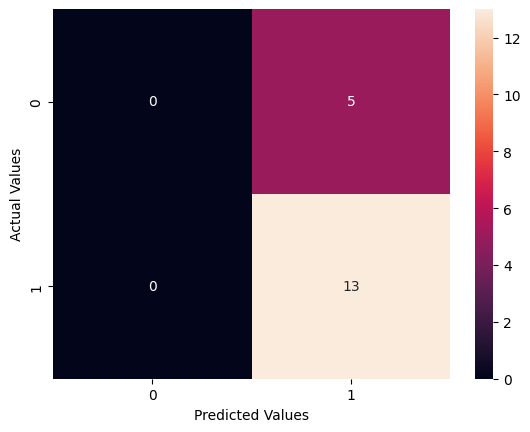

In [ ]:
# Mostrando la confusion matrix
cm = confusion_matrix(y3_test, y3_pred)
fig = plt.figure()
sns.heatmap(cm, annot=True)
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

Junto a los resultados anteriores, en la matriz de confusión se ve que hubo una cantidad significante de falsos positivos, así como la obtención de solo una clase predicha por lo que no se obtuvo un correcto clasificador pese a que el valor p indicara que es significativo. Por ello se aplicará el balance ROS.

## Balance ROS

In [ ]:
train = np.concatenate([x3_train, y3_train.values.reshape(-1,1)], axis=1)

In [ ]:
train = pd.DataFrame(train,columns=['C','P','P_ventilador','Error_aceptable'])

In [ ]:
# Obtenemos la clase con error que no se acepta
train_class_0 = train.query("Error_aceptable == 0")
train_class_0.head()

,C,P,P_ventilador,Error_aceptable
10,-1.060660,0.439871,0.223825,0.0
12,-1.060660,1.027543,0.960943,0.0
13,0.942809,-1.064570,-0.779474,0.0
16,0.942809,-1.691421,-1.363025,0.0
20,-1.060660,-0.845173,-0.984229,0.0


In [ ]:
# Mostrando la relacion del Error_Aceptable
n_class0 = len(train.query("Error_aceptable == 0"))
n_class1 = len(train.query("Error_aceptable == 1"))
print ( n_class0, n_class1)

11 40


In [ ]:
# Haciendo el sampleo
i_class0_downsampled = train_class_0.sample(n_class1,replace = True)
len(i_class0_downsampled)

40

In [ ]:
# Creando el nuevo dataset
new_train = pd.concat([train.query("Error_aceptable == 1"), i_class0_downsampled], axis=0)
new_train[['Error_aceptable']].value_counts()

Error_aceptable
0.0                40
1.0                40
dtype: int64

In [ ]:
# Creando nuevas variables para el entrenamiento
new_x_train =new_train.loc[:,['C','P','P_ventilador']].values
new_y_train =new_train.loc[:,['Error_aceptable']].values

In [ ]:
new_y_train = pd.Series(new_y_train.reshape(-1,))

In [ ]:
# Haciendo el nuevo modelo
model= LogisticRegression()
model. fit(new_x_train, new_y_train)


LogisticRegression()

In [ ]:
# Haciendo la predicción para los datos del test
y3_pred2 = model.predict(x3_test)

### Metricas


In [ ]:
# Mostrando datos para comparar
print(classification_report(y3_test, y3_pred))
print(classification_report(y3_test, y3_pred2))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.72      1.00      0.84        13

    accuracy                           0.72        18
   macro avg       0.36      0.50      0.42        18
weighted avg       0.52      0.72      0.61        18

              precision    recall  f1-score   support

           0       0.75      0.60      0.67         5
           1       0.86      0.92      0.89        13

    accuracy                           0.83        18
   macro avg       0.80      0.76      0.78        18
weighted avg       0.83      0.83      0.83        18



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Comparandolo ahora con el modelo tras el balance, se puede ver una mejora en los distintos parámetros tales como la presición, el peso promedio y el promedio macro. Esto indica que se obtuvo un mejor clasificador.

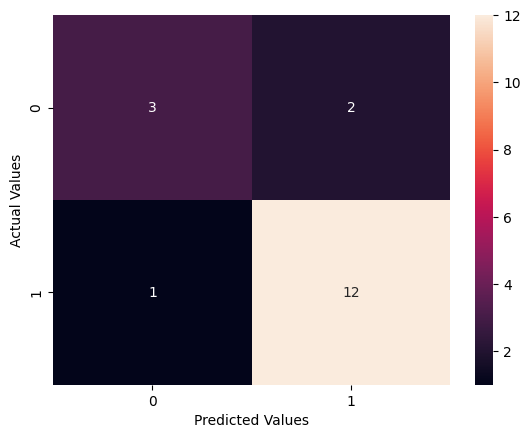

In [ ]:
# Mostrando los errores en la predicción
cm = confusion_matrix(y3_test, y3_pred2)
fig = plt.figure()
sns.heatmap(cm, annot=True)
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

En la matriz de confusión hay 2 falsos positivos y un falso negativo, por lo que estas son las predicciones con mayor precisión obtenidas; además, existe una mayor variabilidad en las predicciones de distinta clase debido a que, como se vio en el cuadro comparativo anterior, hubo un mejor valor del peso promedio y el promedio macro que permite clasificar de mejor forma los datos de entrada en diferentes categorías en general.

# Conclusiones

En estos ejerecicios se destaca la importancia de escoger un correcto modelo, en este caso de regresión lineal, que permitan no solo predecir de manera optima las clases de determinados inputs, sino que los resultados obtenidos tengan una significancia estadística que permita verificar si el clasificador es eficiente y que los resultados no hayan sido hechos por el azar. Además, se pudo corroborar como la aplicación de un balance ROS mejora en gran medida el desempeño del modelo permitiendo obtener predicciones mas fiables. Para el ejercicio elaborado, se concluye que el mejor modelo predictivo es el obtenido a partir de 3 variables: C', 'PIP' y 'P_ventilador' tras pasar por un balance ROS. Los resultados de este modelo fueron estadísticamente significativos por su p-value menor a 0.05, con una presición de 83% y con la menor cantidad de falsos positivos y negativos, así como de una variabilidad en la selección de las clases. 

#Referencias

1.   https://ceur-ws.org/Vol-710/paper37.pdf
2.   https://home.iitk.ac.in/~shalab/regression/Chapter2-Regression-SimpleLinearRegressionAnalysis.pdf
3.   https://www.analyticsvidhya.com/blog/2020/04/confusion-matrix-machine-learning/